In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('/advertising_sales_data.xlsx')

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
dataset['Radio']=dataset['Radio'].fillna(dataset['Radio'].median())

1.) What is the average amount spent on TV advertising in the dataset?


In [ ]:
print(f"average amount spent on TV advertising in the dataset: {dataset['TV'].mean()}")

average amount spent on TV advertising in the dataset: 147.0425


2.) What is the correlation between radio advertising expenditure and product sales?

In [ ]:
correlation = dataset['Radio'].corr(dataset['Sales'])
print("correlation between radio advertising expenditure and product sales:", correlation)

if correlation > 0.9:
  print("Very high positive correlation")
elif correlation > 0.7:
  print("High positive correlation")
elif correlation > 0.5:
  print("Moderate high positive correlation")
elif correlation > 0.3:
  print("Low positive correlation")
elif correlation > 0.0:
  print("negligible correlation")
elif correlation == 0:
  print("No correlation")
elif correlation > -0.3:
  print("Negligible correlation")
elif correlation > -0.5:
  print("Low negative correlation")
elif correlation > -0.7:
  print("Moderate negative correlation")
elif correlation > -0.9:
  print("High negative correlation")
else:
  print("Very high negative correlation.")

correlation between radio advertising expenditure and product sales: 0.3495931347494022
Low positive correlation


3.) Which advertising medium has the highest impact on sales based on the dataset?

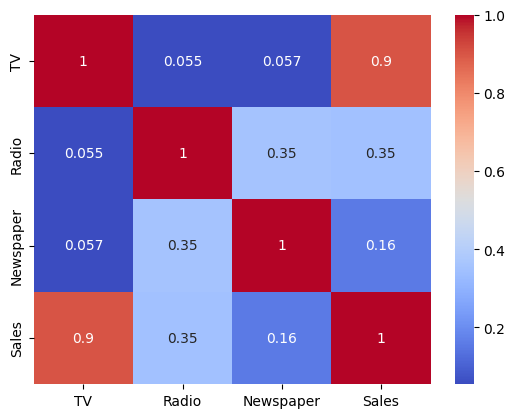

TV has the highest impact on sales.


In [ ]:
matrix = dataset.select_dtypes(include='number').corr()
sns.heatmap(matrix, annot = True, cmap='coolwarm')
plt.show()

if matrix['Sales']['TV']>matrix['Sales']['Radio'] and matrix['Sales']['TV']>matrix['Sales']['Newspaper']:
  print('TV has the highest impact on sales.')
elif matrix['Sales']['TV'] < matrix['Sales']['Radio'] and matrix['Sales']['Radio'] > matrix['Sales']['Newspaper']:
  print('Radio has the highest impact on sales.')
else:
  print('Newspaper has the highest impact on sales.')

4.) Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.


In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

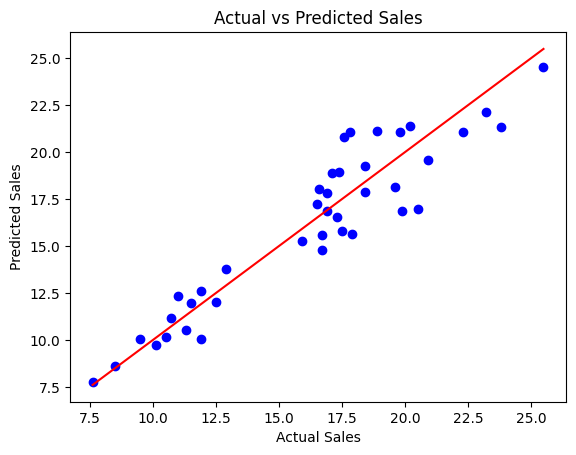

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.show()

5.) How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?


In [ ]:
new_data = [[200, 40, 50]]
sales_pred = regressor.predict(new_data)
print(f"Predicted Sales: {sales_pred[0]:.2f}")

Predicted Sales: 19.73


6.) How does the performance of the linear regression model change when the dataset is normalized?


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled, y, test_size=0.2, random_state=1)
reg = LinearRegression()
reg.fit(x_train2, y_train2)
y_pred2 = reg.predict(x_test2)

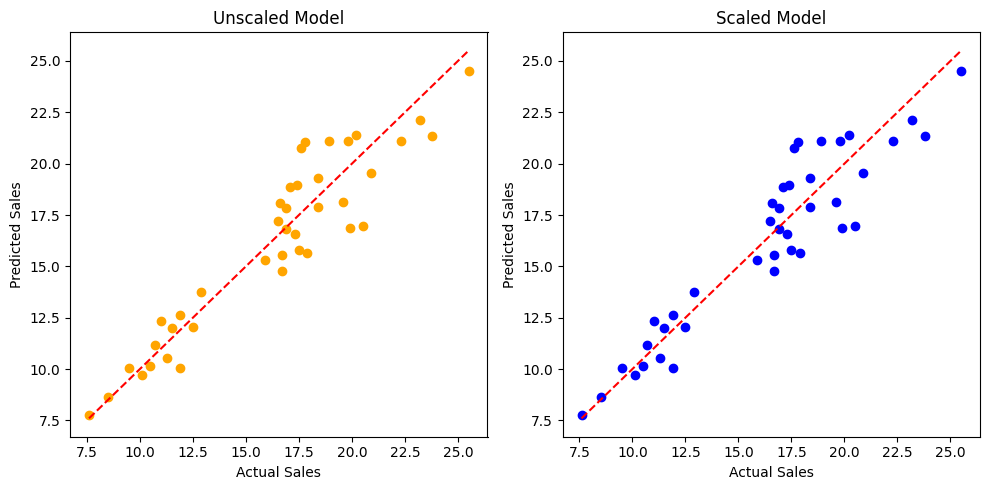

In [ ]:
plt.figure(figsize=(10, 5))

# Unscaled plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Unscaled Model")

# Scaled plot
plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred2, color='blue')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Scaled Model")

plt.tight_layout()
plt.show()


7.) What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [ ]:
x2 = dataset.iloc[:, 2:-1].values
y2 = dataset.iloc[:, -1]

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state=1)
reg2 = LinearRegression()
reg2.fit(x2_train, y2_train)
y2_pred = reg2.predict(x2_test)

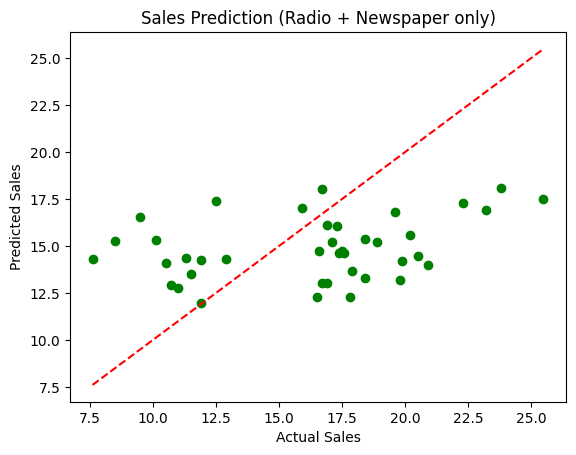

In [ ]:
plt.scatter(y2_test, y2_pred, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales Prediction (Radio + Newspaper only)")
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.show()